In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('../data/train.csv', encoding='utf-8')
test_df = pd.read_csv('../data/test.csv', encoding='utf-8')

train_df.head()

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
0,57298928,2020-01-01,121,2O5A2,82ZHWNL,NaN,TQ18AK,D,B,15,...,5.397966e+03,10,2106003,8481900000,US,US,A,8.0,1,1
1,85092852,2020-01-01,30,305K5,5IS70LE,NaN,NaN,C,B,11,...,5.730972e+05,40,4077010,2106909099,US,US,A,8.0,0,0
2,63014158,2020-01-01,20,CGMT6,GJ5KBL3,R9ZQOG7,NaN,D,B,11,...,5.219489e+04,40,4077007,6307909000,US,US,A,10.0,0,0
3,40175917,2020-01-01,40,QWUTG,PBYW02T,NaN,NaN,C,B,94,...,1.773608e+06,40,4077106,6505009090,CN,CN,A,8.0,0,0
4,11602631,2020-01-01,30,0X1CO,MCX0GJB,4Z9PX0Y,NaN,C,B,11,...,8.777327e+06,40,2006075,6204320000,CN,CN,FCN1,5.2,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89355 entries, 0 to 89354
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      89355 non-null  int64  
 1   신고일자      89355 non-null  object 
 2   통관지세관부호   89355 non-null  int64  
 3   신고인부호     89355 non-null  object 
 4   수입자부호     89346 non-null  object 
 5   해외거래처부호   58923 non-null  object 
 6   특송업체부호    29305 non-null  object 
 7   수입통관계획코드  89355 non-null  object 
 8   수입신고구분코드  89355 non-null  object 
 9   수입거래구분코드  89355 non-null  int64  
 10  수입종류코드    89355 non-null  int64  
 11  징수형태코드    89355 non-null  int64  
 12  신고중량(KG)  89355 non-null  float64
 13  과세가격원화금액  89355 non-null  float64
 14  운송수단유형코드  89355 non-null  int64  
 15  반입보세구역부호  89355 non-null  int64  
 16  HS10단위부호  89355 non-null  int64  
 17  적출국가코드    89355 non-null  object 
 18  원산지국가코드   89355 non-null  object 
 19  관세율구분코드   89355 non-null  object 
 20  관세율       89355 non-null  fl

In [5]:
train_df.isnull().sum()

신고번호            0
신고일자            0
통관지세관부호         0
신고인부호           0
수입자부호           9
해외거래처부호     30432
특송업체부호      60050
수입통관계획코드        0
수입신고구분코드        0
수입거래구분코드        0
수입종류코드          0
징수형태코드          0
신고중량(KG)        0
과세가격원화금액        0
운송수단유형코드        0
반입보세구역부호        0
HS10단위부호        0
적출국가코드          0
원산지국가코드         0
관세율구분코드         0
관세율             0
우범여부            0
핵심적발            0
dtype: int64

In [6]:
train_df["우범여부"].value_counts()

0    68795
1    20560
Name: 우범여부, dtype: int64

In [7]:
train_df["핵심적발"].value_counts()

# 0:우범x, 1:우범-일반, 2:우범-핵심

0    68795
2    10581
1     9979
Name: 핵심적발, dtype: int64

null값 처리

0. 그대로
1. null값 있는 행 삭제
2. null값 있는 열 삭제

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# sns.pairplot(train_df, hue="우범여부")

c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_

<AxesSubplot:>

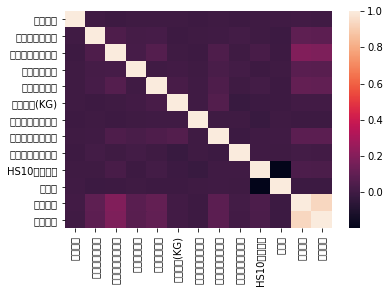

In [13]:
sns.heatmap(train_df.corr())

In [8]:
# 1. null 행 삭제

train_df1=train_df.dropna(subset=['해외거래처부호'])
train_df1=train_df1.dropna(subset=['특송업체부호'])

train_df1

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,...,과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
6,33191755,2020-01-01,40,BTMNQ,I0J35SK,ZKHM0AL,PAVJZL,D,B,11,...,0.000000e+00,40,2002079,3915909000,JP,JP,C,6.5,0,0
10,57436964,2020-01-01,10,WN68Z,5XHH0J9,4YL3O5A,VACAWV,B,B,11,...,1.259147e+05,40,3078004,7117900000,JP,IT,A,8.0,1,1
11,71573235,2020-01-01,150,LDZ42,J99M8LS,SN8RK0W,QP5OME,D,B,11,...,2.795702e+05,40,2010019,3304999000,TH,TH,C,6.5,1,1
14,64162803,2020-01-01,140,90DJS,RVFN1RO,3NNLDRF,ID7FLR,C,B,88,...,1.993612e+05,50,2012014,3926109000,CN,CN,C,6.5,1,1
18,44340845,2020-01-01,20,J9SYX,CKEPNRJ,TIJE2TU,TQ18AK,F,B,11,...,2.442341e+06,10,1606020,8483909000,US,US,A,8.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89344,30405799,2020-11-22,40,8SQNH,DDLVTSO,ZGF7GUV,6VXR7R,D,B,11,...,1.649127e+05,10,3077016,9025191000,DE,DE,FEU1,0.0,0,0
89345,19407871,2020-11-22,30,KPMXW,G719X9Z,9XJ9SG2,RDEAWL,F,B,15,...,2.218294e+05,10,1612002,2905122090,US,US,FUS1,0.5,0,0
89347,61195551,2020-11-22,50,VRNEF,U8CIYDB,Z5200T8,TQ18AK,F,B,15,...,2.724309e+06,30,4077014,7610100000,CN,CN,FCN1,4.8,0,0
89348,37548420,2020-11-22,16,QUHSG,ZL9RXK2,OJI0XYP,A9QWI8,F,B,91,...,4.259797e+04,10,1607008,7006009000,CN,CN,FCN1,0.0,1,1


랜덤포레스트 모델 (의사결정트리+앙상블기법)

In [61]:
import re
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [49]:
def data_preprocessing(df):
    preprocessing_df = df.copy()
    preprocessing_df['신고일자'] = list(map(lambda x : re.sub('[^0-9]+', '', x), preprocessing_df['신고일자']))
    preprocessing_df = preprocessing_df.drop(columns=['신고인부호', '수입자부호', '수입통관계획코드', '수입신고구분코드', '해외거래처부호', '특송업체부호'])
    

In [50]:
# def get_dataset():
#     X = train_df1.iloc[:, :-2]
#     X['신고일자'] = list(map(lambda x : re.sub('[^0-9]+', '', x), X['신고일자']))
#     X = X.drop(columns=['신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '관세율구분코드', '적출국가코드', '원산지국가코드', '수입통관계획코드', '수입신고구분코드'])
#     y = train_df1.iloc[:, -1:]
    
#     X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
#     return X_train, X_test, y_train, y_test

In [115]:
X = train_df1.iloc[:, :-2]
X['신고일자'] = list(map(lambda x : re.sub('[^0-9]+', '', x), X['신고일자']))
X = X.drop(columns=['신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '관세율구분코드', '적출국가코드', '원산지국가코드', '수입통관계획코드', '수입신고구분코드'])
y = train_df1.iloc[:, -1:]

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

In [51]:
# X_train, X_test, y_train, y_test = get_dataset()

In [56]:
X_train

,신고번호,신고일자,통관지세관부호,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,관세율
30792,47853847,20200408,10,11,21,11,2577.3,5.495408e+03,10,2010724,7326909000,8.0
88685,23208276,20201119,40,11,21,11,49768.9,1.214625e+07,10,2012016,6911109000,8.0
67382,19292829,20200824,40,87,21,18,53.2,3.677225e+05,40,2010401,8703239010,0.0
36697,15705971,20200504,20,15,21,11,5012.6,1.866106e+06,10,2006026,4420902090,8.0
67014,90324870,20200821,40,91,21,11,6445.2,8.431741e+07,40,4076003,8541501000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77358,67278336,20201006,12,11,21,11,7262.9,3.126550e+06,90,4077008,3910009090,6.5
49658,82280173,20200619,40,11,21,11,2094.9,3.668205e+04,30,14002010,5705000000,10.0
40977,80931006,20200518,40,96,21,0,319.5,7.186448e+05,10,2106003,3822002099,0.0
28440,85933523,20200331,13,94,21,14,2429.3,3.041193e+05,40,4077010,4017002000,0.0


In [46]:
# 신고인부호 = list(set(X_train['신고인부호']))
# 신고인부호

In [29]:
# encoder = LabelEncoder()
# encoder.fit(신고인부호)
# labels = encoder.transform(신고인부호)
# print('인코딩 변환값:',labels)

인코딩 변환값: [ 42 730 817 362 184 317 201 804 698 942 653 849 162 213  62 812 434 793
  83 292 854  21 270  57 540 344 902 908 250 394 193 376 888 635 646 846
 599 532 139 388 351 283 848 629 415 146 814 526 443 947 631 677 513 583
  89 431 231 370 789 738 943 525 714 785 411 925 749 419 636 302 884 254
 416 876 670 861 600 739 180  97 469 853 616 348   3  17 246 920 649 607
 847 218 185 142 106 901 701 393 440 490 675 308 750 433 903  92 261 602
 637 273 384 396 905  10 791  22 704  80 606 634 420 438  48 169 784 622
 395 941 844 581 456 444  82 200 911 197 398 439 788 310 916 386 129 535
 669 161 364 311 277 221 515 731 449 258 357 840 645  77 808 278 542 554
 195 235 676 719  18 350 751 556 914 729 165 187 356 652 491 877 874 735
 811 626 563 153 918 605 667 120 104 715 295 118 688 368 422 693 337 538
 480 780 945 570 782 611  79 369 313 824 921 333 552 944 170 807 293  87
 658 482 728 450  70 479 856 702 724 421  20 825 551 290 872 650 167 778
 175 773 291 813  44 109 328 103 530 128 2

In [30]:
# print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['00553' '00Z2U' '02OP9' '03IV0' '04PCF' '0A0V6' '0BCW8' '0BW53' '0GUZD'
 '0GY99' '0GZ27' '0HBED' '0HQQA' '0HQV0' '0IBYN' '0QN4A' '0QRQ8' '0R8LM'
 '0RA0G' '0SDJE' '0T4OU' '0T7H9' '0TSUK' '0UD1R' '0UYR6' '0X1CO' '0ZK7G'
 '10W4X' '112BI' '12XQH' '14AJ4' '14MCZ' '153NL' '18XPW' '1BWI9' '1EH3Z'
 '1HM4B' '1HUE4' '1IKCX' '1QC72' '1RC31' '1S4VL' '1T4SL' '1T62E' '1V8KP'
 '1W5SH' '1WCZK' '1XNUV' '1XQ5R' '20QAN' '20ZVA' '21X6T' '24U3F' '287N9'
 '2BW8U' '2CY59' '2DOHT' '2EO6C' '2GKZT' '2HAU3' '2HFRM' '2IRWC' '2JA5W'
 '2O5A2' '2P7HO' '2RRLE' '2RRV1' '2SE2P' '2SGER' '2T8ID' '2VC4X' '2VH3Z'
 '2ZRHS' '305K5' '30Q2U' '31JEH' '343A9' '346YV' '355TQ' '35U6G' '379YD'
 '382MF' '38T53' '3A8I7' '3AZ57' '3DZ0U' '3E02B' '3GXTX' '3GYLK' '3HJNU'
 '3HQJ1' '3HYIL' '3I2L1' '3MI2K' '3NUHD' '3NVGH' '3OA23' '3P2Q6' '3P56A'
 '3R276' '3RQEU' '3RXQA' '3U5HN' '3V1GM' '3VAS0' '3YNH8' '3ZADI' '4310N'
 '43SM9' '466A0' '48BVY' '4A4CW' '4AQVL' '4BKQH' '4D26Q' '4DNI3' '4GV6J'
 '4IQ6O' '4J1FC' '4JDJE' '4MC8T' '4NDGH' '

In [57]:
X_test

,신고번호,신고일자,통관지세관부호,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,관세율
67153,56458804,20200824,40,91,21,43,4718.0,1.182714e+07,40,8107003,2933399090,0.0
41771,64425212,20200521,40,96,21,43,4018.2,4.823038e+05,10,2077002,8203201000,8.0
5387,47734257,20200116,80,11,21,11,3940.7,9.204759e+05,10,2010360,6506100000,3.2
57571,95067668,20200720,12,86,21,11,1953.3,5.653528e+05,10,4077132,4601949000,0.0
1286,52721308,20200106,13,11,21,11,5285.0,1.963488e+05,40,3099999,3004909900,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34563,54986663,20200423,140,11,21,13,6804.0,8.762021e+05,10,3078001,2204211000,0.0
13916,89653615,20200212,16,15,26,14,1111.0,2.304417e+05,30,12006008,6806102000,4.8
31758,34737796,20200413,40,11,21,14,31.7,3.159842e+03,30,2086167,4013909010,0.0
22483,29004606,20200309,40,87,21,18,15718.3,1.574912e+06,40,3070141,9025191000,0.0


In [117]:
y_train

,핵심적발
30792,2
88685,2
67382,2
36697,0
67014,0
...,...
77358,0
49658,0
40977,0
28440,0


In [118]:
# forest = RandomForestClassifier(n_estimators=3, random_state=1)
# forest.fit(X_train, y_train)

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=None, max_features='auto', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=3,
#                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                        warm_start=False)

# fig, axes = plt.subplots(2,3 , figsize = (20,10))
# for i , (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
#     ax.set_title("트리 {}".format(i))
#     mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)
    
# mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha= .4)
# axes[-1,-1].set_title("랜덤 포레스트")
# mglearn.discrete_scatter(X[:,0], X[:,1], y)

# X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
# forest = RandomForestClassifier(n_estimators=100, random_state = 0)
# forest.fit(X_train, y_train)

# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
    
# plot_feature_importances_cancer(forest)

forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=1)
forest.fit(X_train,np.ravel(y_train))

predict = forest.predict(X_test)
print(accuracy_score(y_test,predict))

0.5283722438391699


In [119]:
predict_df = pd.DataFrame(predict)
predict_df.value_counts()

0    5541
2     504
1     123
dtype: int64

In [129]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
신고번호 = X_test.iloc[:, 0]
신고번호.reset_index(drop=True, inplace=True)

li = []
for x in predict:
    if x == 0:
        li.append(0)
    else:
        li.append(1)
우범여부 = pd.DataFrame(li)
        
Result = pd.concat([신고번호, 우범여부, predict_df], axis=1)
Result.columns = ['신고번호', '우범여부', '핵심적발']
Result

,신고번호,우범여부,핵심적발
0,56458804,0,0
1,64425212,0,0
2,47734257,0,0
3,95067668,1,2
4,52721308,0,0
...,...,...,...
6163,54986663,0,0
6164,89653615,1,1
6165,34737796,0,0
6166,29004606,0,0


In [135]:
Result.to_csv('./WeHave5min.csv', encoding='utf-8', index=None)

In [16]:
# 2. null 열 삭제

train_df2=train_df.drop(columns=['해외거래처부호', '특송업체부호'])

train_df2

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,...,과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부,핵심적발
0,57298928,2020-01-01,121,2O5A2,82ZHWNL,D,B,15,23,43,...,5.397966e+03,10,2106003,8481900000,US,US,A,8.0,1,1
1,85092852,2020-01-01,30,305K5,5IS70LE,C,B,11,21,11,...,5.730972e+05,40,4077010,2106909099,US,US,A,8.0,0,0
2,63014158,2020-01-01,20,CGMT6,GJ5KBL3,D,B,11,21,18,...,5.219489e+04,40,4077007,6307909000,US,US,A,10.0,0,0
3,40175917,2020-01-01,40,QWUTG,PBYW02T,C,B,94,21,43,...,1.773608e+06,40,4077106,6505009090,CN,CN,A,8.0,0,0
4,11602631,2020-01-01,30,0X1CO,MCX0GJB,C,B,11,21,43,...,8.777327e+06,40,2006075,6204320000,CN,CN,FCN1,5.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89350,78046993,2020-11-22,10,M9SYU,K8195QD,C,B,11,21,11,...,9.139535e+04,10,4002001,703101000,CN,CN,W2,135.0,0,0
89351,85641293,2020-11-22,41,T7VQN,MSE4EAG,E,E,15,11,11,...,3.752803e+04,40,4077008,6804220000,CN,CN,FCN1,0.0,0,0
89352,15760215,2020-11-22,40,7Q31W,5BC6UCR,C,B,29,21,11,...,1.381431e+04,10,2086001,8210005000,CN,CN,A,8.0,0,0
89353,20569033,2020-11-22,40,UJ0JR,U7KJPA6,F,B,15,21,14,...,4.030176e+03,40,1618003,3304999000,CA,CA,C,6.5,1,2
